In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Matrix_inverse import inverse
from LU import lu
from Determinant import determinant

In [2]:
from time import perf_counter

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = perf_counter()
        res = func(*args, **kwargs)
        t2 = perf_counter()
        return res, round(t2 - t1, 4)
    return wrapper

def random_matrix(size):
    return np.random.uniform(0.00000001, 1, (size, size))

Quick tests

In [3]:
from test_algorithms import test_determinant
from test_algorithms import test_inverse
from test_algorithms import test_lu
from Arithmetic_counter import Counter


sizes = np.array([pow(2, i) for i in range(6)])

for s in sizes:
    rand_matrix = random_matrix(s)
    test_determinant(rand_matrix)
    test_inverse(rand_matrix)
    test_lu(rand_matrix)
    print()

Test passed
Test passed
Test passed

Test passed
Test passed
Test passed

Test passed
Test passed
Test passed

Test passed
Test passed
Test passed

Test passed
Test passed
Test passed

Test passed
Test passed
Test passed



In [6]:
sizes = np.array([pow(2, i) for i in range(14)])

timed_det = timeit(determinant)
timed_lu = timeit(lu)
timed_inv = timeit(inverse)

In [7]:
det_results = []
lu_results = []
inv_results = []

for s in sizes:
    print(s)
    rand_matrix = random_matrix(s)

    res, time = timed_inv(rand_matrix)
    inv_results.append((time, res[-1]))
    print(time)

    res, time = timed_lu(rand_matrix)
    lu_results.append((time, res[-1]))

    res, time = timed_det(rand_matrix)
    det_results.append((time, res[-1]))

1
0.0001
2
0.0002
4
0.0002
8
0.0006
16
0.0013
32
0.0021
64
0.0032
128
0.0131
256
0.0114
512
0.0607
1024
0.2531
2048
0.7703
4096
3.0472
8192
20.7909


In [19]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.power(x, b)

In [141]:
def plot_axis(ax, y, title=""):
    best_params, _ = curve_fit(func, sizes, y)
    a, b = best_params
    print(best_params)
    mesh = np.linspace(0, sizes[-1] + 200, 100)
    curve = func(mesh, *best_params)
    ax.plot(sizes, y, markersize=7, marker="o", linestyle="None", zorder=1, label="Pomiary")
    ax.plot(mesh, curve, marker="None", zorder=0, label=f"Dopasowana krzywa, a={best_params[0]:.2f}, b={best_params[1]:.2f}")
    ax.legend()
    ax.set_title(title)


def print_results(results):
    times, count = zip(*results)
    add, mul, div = zip(*map(Counter.get_params, count))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    plot_axis(ax1, times, title="Pomiary czasu")
    plot_axis(ax2, add, title="Ilość dodawań")
    plot_axis(ax3, mul, title="Ilość mnożeń")
    plot_axis(ax4, div, title="Ilość dzieleń")

    d = {"Wymiar macierzy": sizes,
         "Pomiary czasu[s]": times,
         "Ilość dodawań": add,
         "Ilość mnożeń": mul,
         "Ilość dzieleń": div}

    df = pd.DataFrame(data=d)
    df = df.set_index("Wymiar macierzy")
    plt.savefig("saved_plots/plot2")
    print(df.to_latex(bold_rows=True))


[4.20058149e-11 3.04553853e+00]
[0.82807399 3.00065388]
[0.83332586 3.00000097]
[4.36103129 1.12127439]
\begin{tabular}{lrrrr}
\toprule
 & Pomiary czasu[s] & Ilość dodawań & Ilość mnożeń & Ilość dzieleń \\
Wymiar macierzy &  &  &  &  \\
\midrule
\textbf{1} & 0.000000 & 0 & 1 & 0 \\
\textbf{2} & 0.000100 & 1 & 5 & 2 \\
\textbf{4} & 0.000400 & 22 & 46 & 8 \\
\textbf{8} & 0.001600 & 276 & 404 & 24 \\
\textbf{16} & 0.002600 & 2744 & 3352 & 64 \\
\textbf{32} & 0.006400 & 24464 & 27152 & 160 \\
\textbf{64} & 0.014400 & 206688 & 218080 & 384 \\
\textbf{128} & 0.042700 & 1699648 & 1746752 & 896 \\
\textbf{256} & 0.087200 & 13787008 & 13979008 & 2048 \\
\textbf{512} & 0.137200 & 111067392 & 111843584 & 4608 \\
\textbf{1024} & 0.980900 & 891651584 & 894774784 & 10240 \\
\textbf{2048} & 1.023500 & 7145722880 & 7158256640 & 22528 \\
\textbf{4096} & 4.050200 & 57215956992 & 57266182144 & 49152 \\
\textbf{8192} & 34.819700 & 457928642560 & 458129739776 & 106496 \\
\bottomrule
\end{tabular}



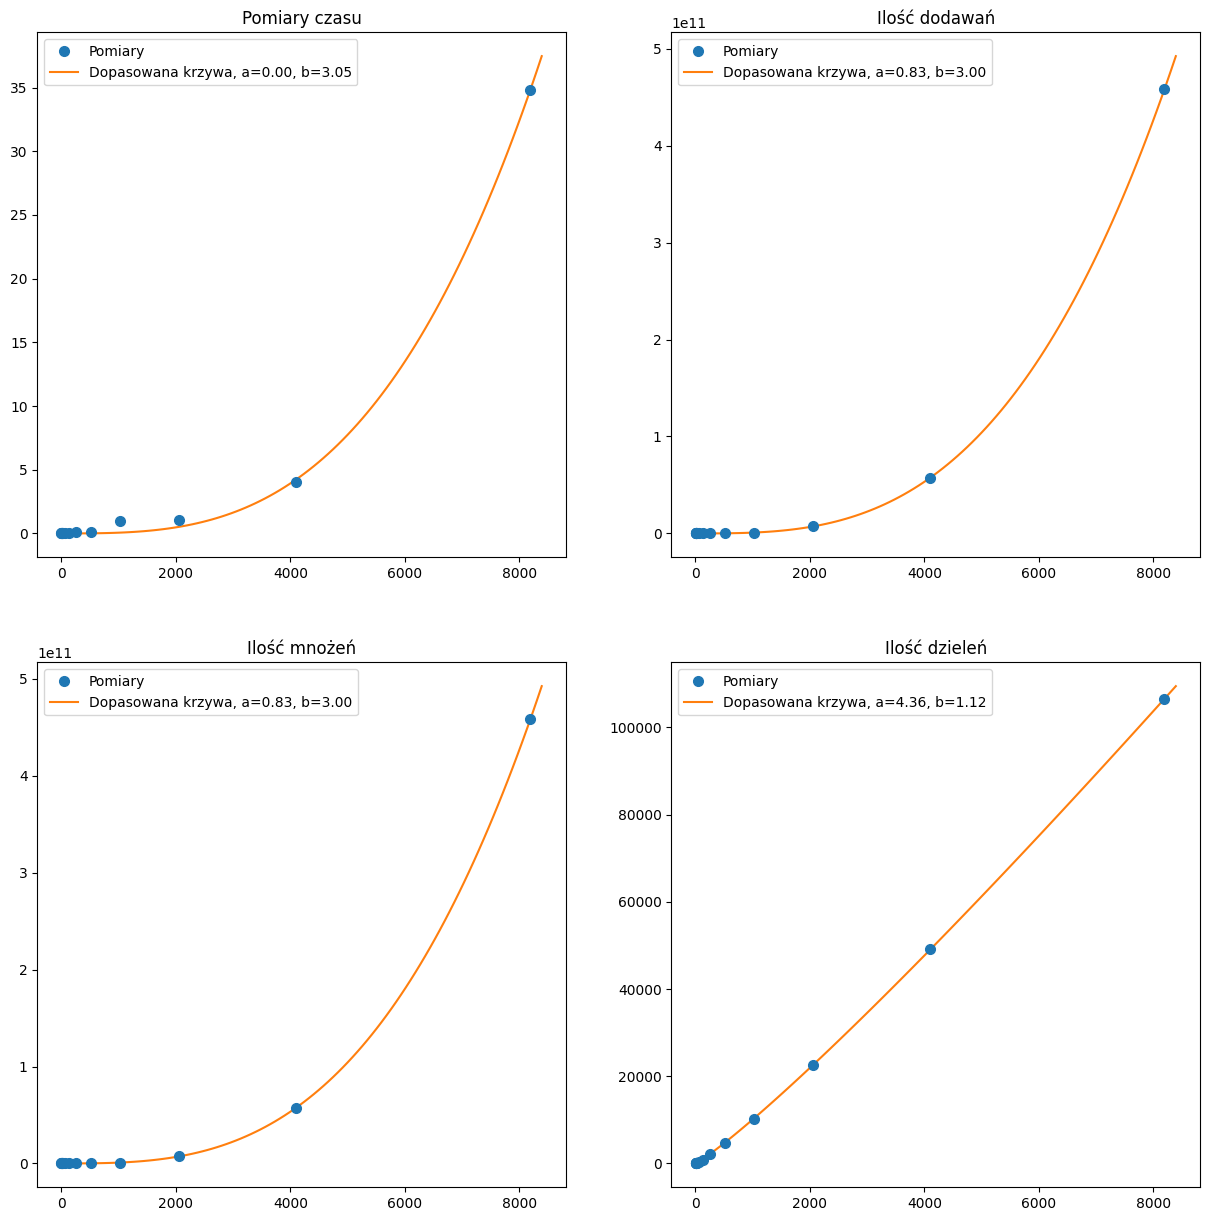

In [142]:
print_results(det_results)